In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data collection

In [3]:
pd.set_option('display.max_rows', 2)

In [4]:
A = pd.read_csv('A.csv', parse_dates=True, index_col=0); A

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000
...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,472700000


In [5]:
B = pd.read_csv('B.csv', parse_dates=True, index_col=0); B

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,3092080000
...,...,...,...,...,...,...
2020-05-14,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,5641920000


In [6]:
C = pd.read_csv('C.csv', parse_dates=True, index_col=0); C

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-15,12.46,13.090000,12.350000,12.380000,12.380000,0
...,...,...,...,...,...,...
2020-05-14,35.16,39.279999,32.330002,32.610001,32.610001,0


In [7]:
# Data Munging

In [8]:
merged_df = A.join(B, how='outer', lsuffix='_A', sort=True).join(C, how='outer', lsuffix='_B', rsuffix='_C', sort=True)

In [9]:
merged_df

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000.0,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,3.092080e+09,12.46,13.090000,12.350000,12.380000,12.380000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,472700000.0,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,5.641920e+09,35.16,39.279999,32.330002,32.610001,32.610001,0.0


In [10]:
# Data cleaning

In [11]:
merged_df[merged_df.isnull().all(axis=1)]

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,


In [12]:
merged_df[['Close_A', 'Close_B', 'Close_C']].isnull().any(axis=1).sum()

148

In [13]:
valid_close_df = merged_df.dropna(subset=['Close_A', 'Close_B', 'Close_C'], how='any')

In [14]:
valid_close_df[['Close_A', 'Close_B', 'Close_C']].isnull().any(axis=1).sum()

0

In [15]:
valid_close_df

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,108220000.0,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,3.092080e+09,12.46,13.090000,12.350000,12.380000,12.380000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,472700000.0,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,5.641920e+09,35.16,39.279999,32.330002,32.610001,32.610001,0.0


In [16]:
valid_close_df.isnull().any(axis=1).sum()

165

In [17]:
valid_close_df[valid_close_df.isnull().any(axis=1)]

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
Date,,,,,,,,,,,,,,,,,,
2015-05-18,18267.250000,18325.539063,18244.259766,18298.880859,18298.880859,79080000.0,2121.300049,2131.780029,2120.010010,2129.199951,2129.199951,2.888190e+09,13.080000,13.22,NaN,12.730000,12.730000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,24120.779297,24120.779297,23645.300781,23723.689453,23723.689453,418160000.0,NaN,2869.090088,2821.610107,2830.709961,2830.709961,4.753160e+09,38.169998,39.57,36.59,37.189999,37.189999,0.0


In [18]:
valid_close_complete = valid_close_df.fillna(method='backfill')

In [19]:
valid_close_complete.isnull().any(axis=1).sum()

0

In [20]:
# Descriptive Statistics

In [21]:
pd.set_option('display.max_rows', None)
valid_close_complete.describe()

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Volume_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Volume_B,Open_C,High_C,Low_C,Close_C,Adj Close_C,Volume_C
count,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1.111000e+03,1111.000000,1111.000000,1111.000000,1111.000000,1111.000000,1111.0
mean,22291.125036,22402.395046,22168.922744,22292.881128,22292.531416,2.614436e+08,2517.857235,2529.804546,2504.360406,2518.053995,2518.053995,3.746609e+09,14.628353,17.614230,16.655851,16.417606,16.417606,0.0
std,3771.056417,3784.558787,3755.740756,3769.395516,3767.906829,1.537677e+08,374.081451,375.376401,373.086693,374.314671,374.314671,9.013618e+08,29.023906,9.056045,20.123487,8.016538,8.016538,0.0
min,15676.259766,15897.820313,15370.330078,15660.179688,15660.179688,4.589000e+07,1833.400024,1847.000000,1810.099976,1829.079956,1829.079956,1.296540e+09,-400.000000,9.310000,8.560000,9.140000,9.140000,0.0
25%,18232.280274,18285.384766,18156.614258,18230.160156,18227.615235,1.233350e+08,2144.320069,2152.525024,2134.464966,2142.250000,2142.250000,3.247990e+09,12.405000,12.900000,11.875000,12.300000,12.300000,0.0
50%,22762.029297,22872.890625,22634.449219,22773.669922,22773.669922,2.631800e+08,2521.199951,2551.820068,2503.189941,2531.939941,2531.939941,3.560770e+09,14.190000,15.010000,13.470000,14.090000,14.090000,0.0
75%,25516.320312,25659.810547,25382.705078,25518.895508,25518.895508,3.328450e+08,2815.010010,2831.880004,2800.239991,2817.330078,2817.330078,3.967360e+09,17.685001,19.040001,16.809999,17.665000,17.665000,0.0
max,29440.470703,29568.570313,29406.750000,29551.419922,29551.419922,2.190810e+09,3380.449951,3393.520020,3378.830078,3386.149902,3386.149902,9.044690e+09,82.690002,85.470001,330.000000,82.690002,82.690002,0.0


In [22]:
pd.set_option('display.max_rows', 2)

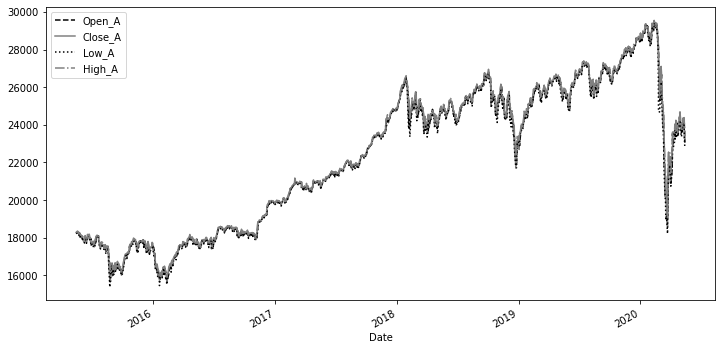

In [23]:
valid_close_complete['Open_A'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_A')
valid_close_complete['Close_A'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_A')
valid_close_complete['Low_A'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_A')
valid_close_complete['High_A'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_A')

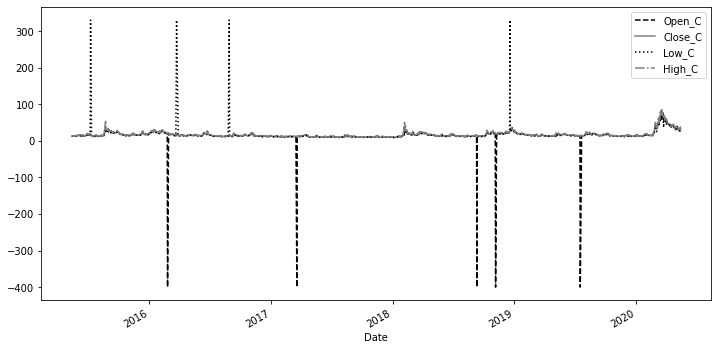

In [24]:
valid_close_complete['Open_C'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_C')
valid_close_complete['Close_C'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_C')
valid_close_complete['Low_C'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_C')
valid_close_complete['High_C'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_C')

In [25]:
# Data cleaning

In [26]:
prices_only = valid_close_complete.drop(['Volume_A', 'Volume_B', 'Volume_C'], axis=1)

In [27]:
prices_only

,Open_A,High_A,Low_A,Close_A,Adj Close_A,Open_B,High_B,Low_B,Close_B,Adj Close_B,Open_C,High_C,Low_C,Close_C,Adj Close_C
Date,,,,,,,,,,,,,,,
2015-05-15,18251.970703,18272.720703,18215.070313,18272.560547,18272.560547,2122.070068,2123.889893,2116.810059,2122.72998,2122.72998,12.46,13.090000,12.350000,12.380000,12.380000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,23049.060547,23630.859375,22789.619141,23625.339844,23625.339844,2794.540039,2852.800049,2766.639893,2852.50000,2852.50000,35.16,39.279999,32.330002,32.610001,32.610001


In [28]:
from scipy import stats
no_outlier_prices = prices_only[(np.abs(stats.zscore(prices_only)) < 6).all(axis=1)]

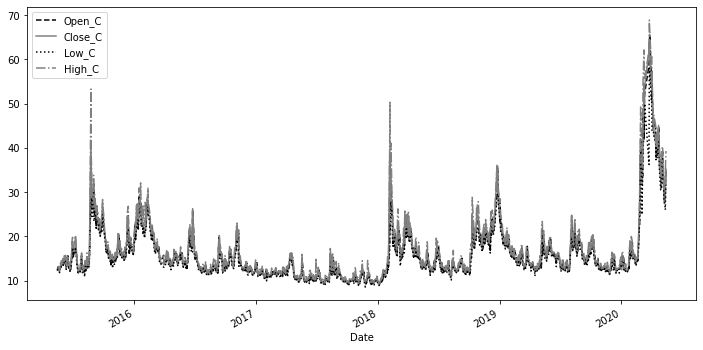

In [29]:
no_outlier_prices['Open_C'].plot(figsize=(12,6), linestyle='--', color='black', legend='Open_C')
no_outlier_prices['Close_C'].plot(figsize=(12,6), linestyle='-', color='grey', legend='Close_C')
no_outlier_prices['Low_C'].plot(figsize=(12,6), linestyle=':', color='black', legend='Low_C')
no_outlier_prices['High_C'].plot(figsize=(12,6), linestyle='-.', color='grey', legend='High_C')

In [30]:
pd.set_option('display.max_rows', None)
no_outlier_prices[['Open_C', 'Close_C', 'Low_C', 'High_C']].describe()

,Open_C,Close_C,Low_C,High_C
count,1095.000000,1095.000000,1095.000000,1095.000000
mean,16.147571,16.072648,15.223635,17.214539
std,6.764147,6.773569,5.995822,7.588690
min,9.010000,9.140000,8.560000,9.310000
25%,12.420000,12.285000,11.865000,12.890000
50%,14.160000,14.060000,13.440000,14.940000
75%,17.625000,17.500000,16.550000,18.929999
max,65.669998,63.950001,58.029999,68.860001


In [31]:
pd.set_option('display.max_rows', 5)

In [32]:
# Visualization

In [33]:
close_prices = no_outlier_prices[['Close_A', 'Close_B', 'Close_C']]

In [34]:
delta_close_prices = (close_prices.shift(-1) - close_prices).fillna(0)
delta_close_prices.columns = ['Delta_Close_A', 'Delta_Close_B', 'Delta_Close_C']

In [35]:
delta_close_prices

,Delta_Close_A,Delta_Close_B,Delta_Close_C
Date,,,
2015-05-15,26.320312,6.469971,0.350000
2015-05-18,13.509766,-1.369873,0.120000
...,...,...,...
2020-05-13,377.369141,32.500000,-2.669998
2020-05-14,0.000000,0.000000,0.000000


In [36]:
pd.set_option('display.max_rows', None)

In [37]:
delta_close_prices.describe()

,Delta_Close_A,Delta_Close_B,Delta_Close_C
count,1095.000000,1095.000000,1095.000000
mean,4.888383,0.666457,0.018475
std,268.137091,29.218995,1.938761
min,-2848.310547,-294.049805,-9.120001
25%,-70.894532,-7.140076,-0.760000
50%,15.539063,1.770020,-0.080000
75%,113.290039,12.255005,0.540001
max,1351.619141,154.510009,20.010001


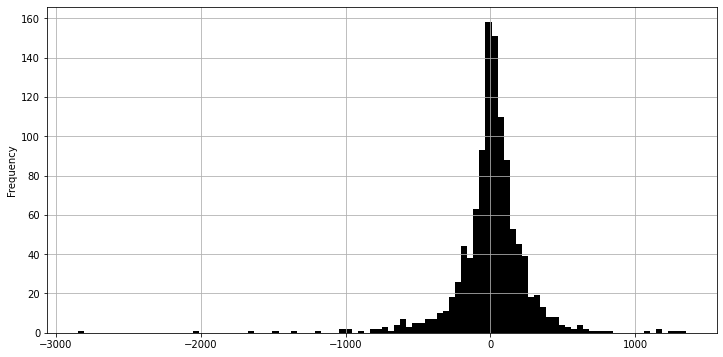

In [38]:
delta_close_prices['Delta_Close_A'].plot(kind='hist', bins=100, figsize=(12,6), color='black', grid=True)

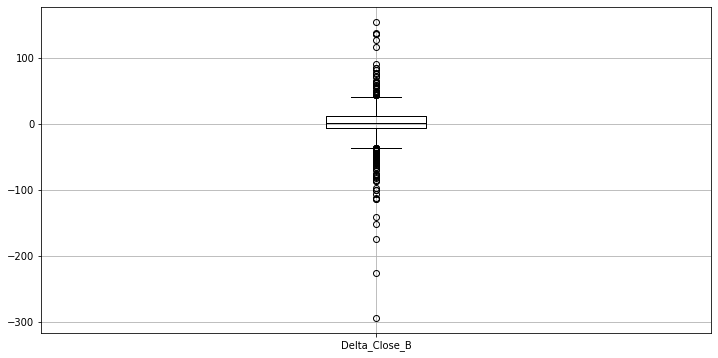

In [39]:
delta_close_prices['Delta_Close_B'].plot(kind='box', figsize=(12,6), color='black', grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9003f5d048>,
      dtype=object)

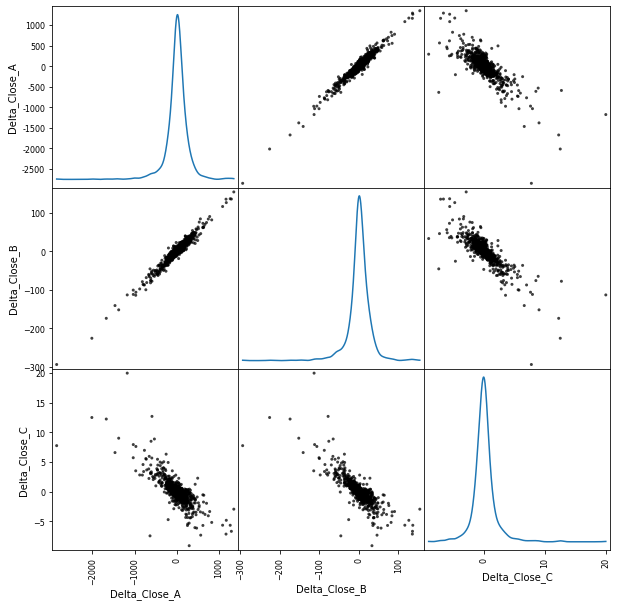

In [40]:
pd.plotting.scatter_matrix(delta_close_prices, figsize=(10,10), color='black', alpha=0.75, diagonal='kde', grid=True)

In [41]:
delta_close_prices.corr()

,Delta_Close_A,Delta_Close_B,Delta_Close_C
Delta_Close_A,1.000000,0.976104,-0.785566
Delta_Close_B,0.976104,1.000000,-0.817788
Delta_Close_C,-0.785566,-0.817788,1.000000


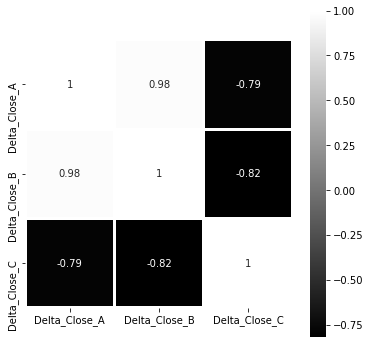

In [43]:
import seaborn as sn
plt.figure(figsize=(6,6))
sn.heatmap(delta_close_prices.corr(), annot=True, square=True, linewidths=2, cmap=plt.cm.gray)